<h1 style = "text-align:center">House Price Prediction</h1>

## Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.


The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

* Which variables are significant in predicting the price of a house.
* How well those variables describe the price of a house.
* Finally, determine the optimal value of lambda for ridge and lasso regression.

## Step 1: Understanding the Data

Let's read the data and understand the basic structure of the data.

In [207]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [298]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale 
from sklearn import metrics
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Importing Ridge and Lasso linear model
from sklearn.linear_model import Ridge, Lasso

In [209]:
# Importing dataset with UTF-8 encoding

housing_dtls = pd.read_csv('train.csv', encoding = 'UTF-8')
housing_dtls.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


There are 81 columns present for our analysis, let's inspect the dataframe

* Basic column details

In [210]:
housing_dtls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

* Shape of the Data Frame

In [211]:
housing_dtls.shape

(1460, 81)

There are 1460 rows and 81 columns present.
* Out of these data inspect if any null values present

In [212]:
print(housing_dtls.isnull().any())

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool


In [213]:
# Total null values columns count
print("Total null values columns count:",housing_dtls.isnull().any().sum())

Total null values columns count: 19


* Describe the columns

In [214]:
housing_dtls.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


There are <b>19  null value columns </b> present, so need to do proper data cleaning.

## Step 2: Data Cleaning 

#### Removing/Attributing NaN values in Categorical attributes
* First lets evaluate the null value columns which are of type 'object'.

In [215]:
# check for null values in all categorical/non -numeric columns

non_num_df = housing_dtls.select_dtypes(include='object').isnull().sum()

In [216]:
non_num_df[housing_dtls.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [217]:
# Replace NA value with None value in the following categorical columns below : 

for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
    
    housing_dtls[col]=housing_dtls[col].fillna('None')

print(non_num_df[housing_dtls.select_dtypes(include='object').isnull().sum()>0])

Series([], dtype: int64)


So, as per the above result all columns has been updated. No nore non-numeric column with null values.
Next step is, lets Remove categorical attributes that has more than 85% of the data associated to one value.

###### Out of 1450 records 85 percent is 1232 (0.85 * 1450 = 1232), therefore the categorical columns with more than 1232 single value columns can be dropped.

In [218]:
# Method to get the column names that have count of one value more than 85%

def getHighCategoricalValueCounts():
    column = []
    categorical_columns = housing_dtls.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(housing_dtls[col].value_counts().max() >= 1232):
            column.append(col)
    return column

columnsToBeRemoved = getHighCategoricalValueCounts()

# Let's Remove the columns with biased data

housing_dtls.drop(columnsToBeRemoved, axis = 1, inplace = True)

housing_dtls.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,None,0,12,2008,Normal,250000


In [219]:
# once again check for null values columns

housing_dtls.select_dtypes(include='object').isnull().sum()[housing_dtls.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

* There is no more null value columns present. 

Next, lets evaluate and remove null values in Numeric columns

In [220]:
# check the null values in the numerical columns, consider both int and float data types.

housing_dtls.select_dtypes(include=['int64','float']).isnull().sum()[housing_dtls.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

Attribute the null values with median values for LotFrontage and MasVnrArea columns, so as per the business scenario and data description given these values cannot be null. Therefore assigning median values to these null values, will not cause any data issues.

* LotFrontage: Linear feet of street connected to property
* MasVnrArea: Masonry veneer area in square feet



In [221]:

housing_dtls['LotFrontage'] = housing_dtls['LotFrontage'].replace(np.nan, housing_dtls['LotFrontage'].median())
housing_dtls['MasVnrArea'] = housing_dtls['MasVnrArea'].replace(np.nan, housing_dtls['MasVnrArea'].median())

Replacing the null values with 0 for GarageYrBlt for now, later we will creating new attribute based on this.

* GarageYrBlt: Year garage was built


In [222]:

housing_dtls['GarageYrBlt']= housing_dtls['GarageYrBlt'].fillna(0)
housing_dtls['GarageYrBlt'] = housing_dtls['GarageYrBlt'].astype(int)

Let's create a new column named 'IsRemodelled' based on the YearBuilt column - This new column would determine whether the house has been remodelled or not based on the difference between remodelled and built years.

YearBuilt: Original construction date

In [223]:
def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
housing_dtls['IsRemodelled'] = housing_dtls.apply(checkForRemodel, axis=1)
housing_dtls.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,2,2008,Normal,208500,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,None,0,5,2007,Normal,181500,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,9,2008,Normal,223500,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,0,None,0,2,2006,Abnorml,140000,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,None,0,12,2008,Normal,250000,0


Similar to YearBuilt, next lets create another new column named BuiltOrRemodelledAge based on YrSold and determine the age of the building at the time of selling.

In [224]:

def getBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
housing_dtls['BuiltOrRemodelAge'] = housing_dtls.apply(getBuiltOrRemodelAge, axis=1)
housing_dtls.head()  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,2,2008,Normal,208500,0,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,None,0,5,2007,Normal,181500,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,9,2008,Normal,223500,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,None,0,2,2006,Abnorml,140000,1,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,None,0,12,2008,Normal,250000,0,8


As discussed above, now lets add a new column OldOrNewGarage, which would indicate if the garage is new or old based on the GarageYrBlt. 

* Therefore Built less than 2000 will be considered as old (0) else new(1). 
* For GarageYrBuilt, where we have attributed the value as 0 will also be treated as old.

In [225]:

def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
housing_dtls['OldOrNewGarage'] = housing_dtls['GarageYrBlt'].apply(getGarageConstructionPeriod)
housing_dtls.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,None,0,2,2008,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,None,0,5,2007,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,None,0,9,2008,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,None,0,2,2006,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,None,0,12,2008,Normal,250000,0,8,1


Since we have created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, we can drop these columns as we 
would only be using the derived columns for further analysis.

In [226]:
housing_dtls.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

#### Remove numerical attributes that have more than 85% data associated to one value.

    - Similar to categorical variables, for numeric columns also, we will remove any column that has one value repeating 1232 times (0.85 *1450 )= 1232 as this column would be skewed to one value.
    - We will also drop MoSold as we will not be using that for further analysis.

In [227]:
def getHighNumericalValueCounts():
    column = []
    numerical_columns = housing_dtls.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(housing_dtls[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighNumericalValueCounts()
housing_dtls.drop(columnsToBeRemoved, axis = 1, inplace = True)

housing_dtls.drop(['MoSold'], axis = 1, inplace = True)

housing_dtls.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,2,548,0,61,None,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,2,460,298,0,None,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,2,608,0,42,None,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,3,642,0,35,None,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,3,836,192,84,None,Normal,250000,0,8,1


In [228]:
# Let's check for percentage of null values in each column

percent_missing = round(100*(housing_dtls.isnull().sum()/len(housing_dtls.index)), 2)
print(percent_missing)

Id                   0.0
MSSubClass           0.0
MSZoning             0.0
LotFrontage          0.0
LotArea              0.0
LotShape             0.0
LotConfig            0.0
Neighborhood         0.0
BldgType             0.0
HouseStyle           0.0
OverallQual          0.0
OverallCond          0.0
RoofStyle            0.0
Exterior1st          0.0
Exterior2nd          0.0
MasVnrType           0.0
MasVnrArea           0.0
ExterQual            0.0
Foundation           0.0
BsmtQual             0.0
BsmtExposure         0.0
BsmtFinType1         0.0
BsmtFinSF1           0.0
BsmtUnfSF            0.0
TotalBsmtSF          0.0
HeatingQC            0.0
1stFlrSF             0.0
2ndFlrSF             0.0
GrLivArea            0.0
BsmtFullBath         0.0
FullBath             0.0
HalfBath             0.0
BedroomAbvGr         0.0
KitchenQual          0.0
TotRmsAbvGrd         0.0
Fireplaces           0.0
FireplaceQu          0.0
GarageType           0.0
GarageFinish         0.0
GarageCars           0.0


Hence there are no null values in the dataset

#### Validate the dataset for duplicate values

In [229]:
housing_dtls[housing_dtls.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage


Great, there are no duplicate entries found.

####  Validate the dataset to identify if any outliers present

In [230]:
housing_dtls.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,...,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,0.476712,22.950000,0.275342
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,...,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,0.499629,20.640653,0.446840
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,...,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,0.000000,4.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,...,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,0.000000,14.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,...,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,1.000000,41.000000,1.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,...,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,1.000000,56.000000,1.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,...,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,1.000000,58.000000,1.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,...,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,1.000000,60.000000,1.000000


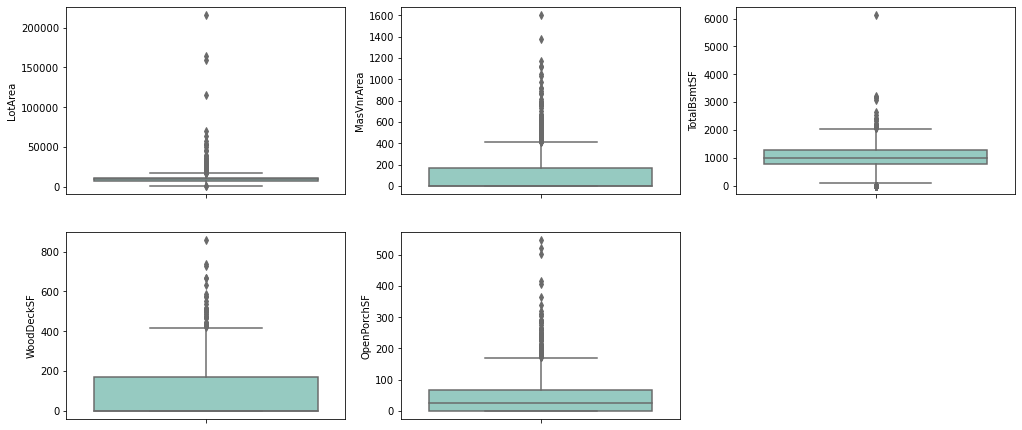

In [231]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = housing_dtls)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = housing_dtls)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = housing_dtls)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = housing_dtls)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = housing_dtls)
plt.show()

##### Removing Outliers
Removing values beyond 98% for LotArea

In [232]:
nn_quartile_LotArea = housing_dtls['LotArea'].quantile(0.98)
housing_dtls = housing_dtls[housing_dtls["LotArea"] < nn_quartile_LotArea]

Removing values beyond 98% for MasVnrArea

In [233]:

nn_quartile_MasVnrArea = housing_dtls['MasVnrArea'].quantile(0.98)
housing_dtls = housing_dtls[housing_dtls["MasVnrArea"] < nn_quartile_MasVnrArea]

Removing values beyond 99% for TotalBsmtSF

In [234]:

nn_quartile_TotalBsmtSF = housing_dtls['TotalBsmtSF'].quantile(0.99)
housing_dtls = housing_dtls[housing_dtls["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

Removing values beyond 99% for WoodDeckSF

In [235]:
nn_quartile_WoodDeckSF = housing_dtls['WoodDeckSF'].quantile(0.99)
housing_dtls = housing_dtls[housing_dtls["WoodDeckSF"] < nn_quartile_WoodDeckSF]

Removing values beyond 99% for OpenPorchSF

In [236]:

nn_quartile_OpenPorchSF = housing_dtls['OpenPorchSF'].quantile(0.99)
housing_dtls = housing_dtls[housing_dtls["OpenPorchSF"] < nn_quartile_OpenPorchSF]

Check the percentage of data retained

In [237]:
num_data = round(100*(len(housing_dtls)/1460),2)
print(num_data)

93.01


## Step 3: Data Visualization 

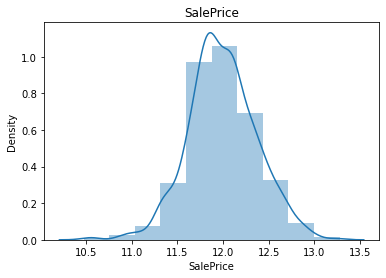

In [238]:
# Visualise the target variable -> SalePrice after transforming the sales price

housing_dtls['SalePrice'] = np.log1p(housing_dtls['SalePrice'])

plt.title('SalePrice')
sns.distplot(housing_dtls['SalePrice'], bins=10)
plt.show()

The target value seems to be normalized with least error.

Let's visualize relationship between SalePrice and other categorical and numeric variables. SalePrice is our target variable.

<Figure size 720x360 with 0 Axes>

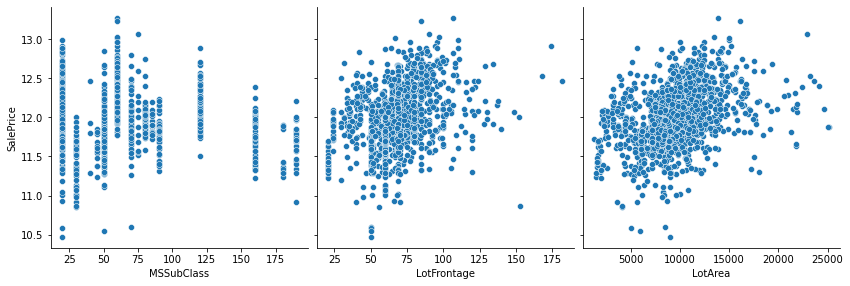

In [239]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(housing_dtls, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')

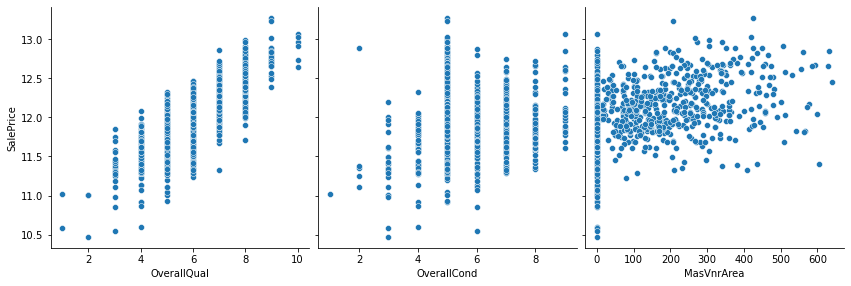

In [240]:
sns.pairplot(housing_dtls, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')

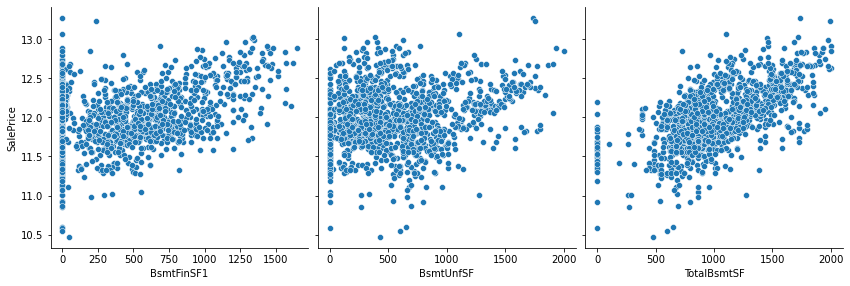

In [241]:
sns.pairplot(housing_dtls, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')

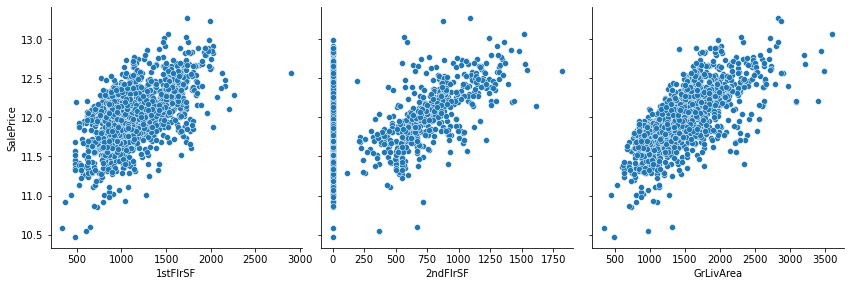

In [242]:
sns.pairplot(housing_dtls, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')

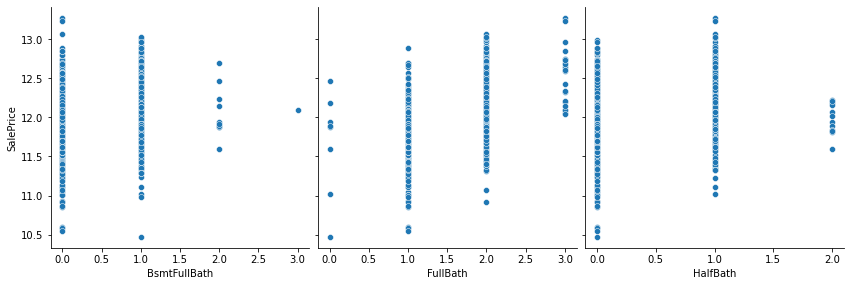

In [243]:
sns.pairplot(housing_dtls, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')


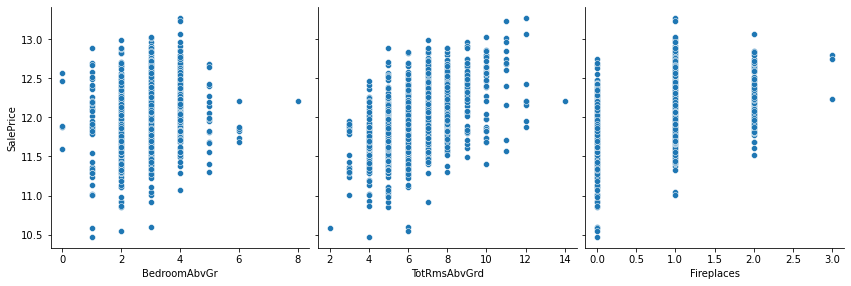

In [244]:
sns.pairplot(housing_dtls, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')


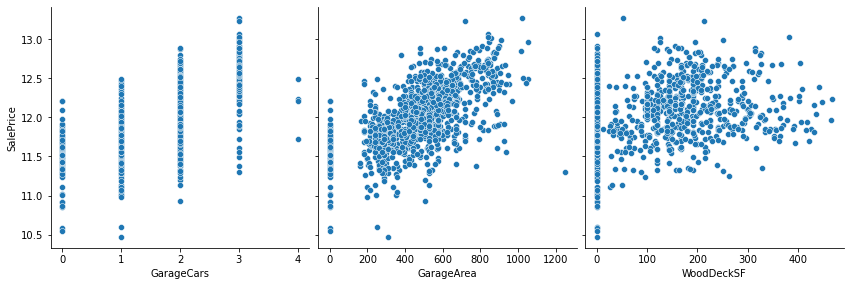

In [245]:
sns.pairplot(housing_dtls, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')


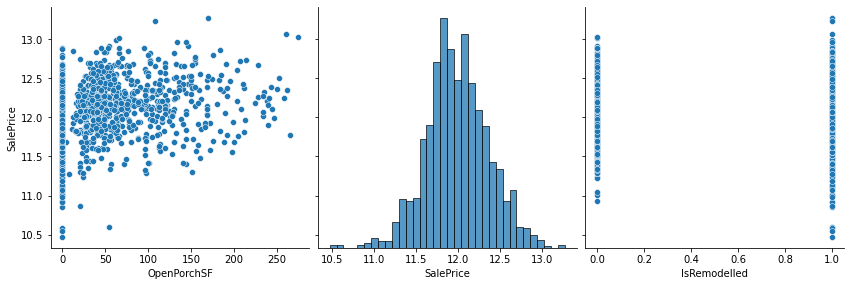

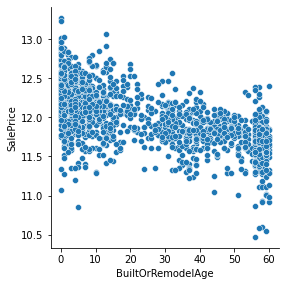

In [246]:
sns.pairplot(housing_dtls, x_vars=['OpenPorchSF','SalePrice', 'IsRemodelled'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_dtls, x_vars=['BuiltOrRemodelAge'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')

###### Observations : 

As per the above pairplots
    - 1stFlrSF, GrLivArea showing correlation towards right
    - Remaining variables are too scattered and therefore we can understand those variables during our further analysis.

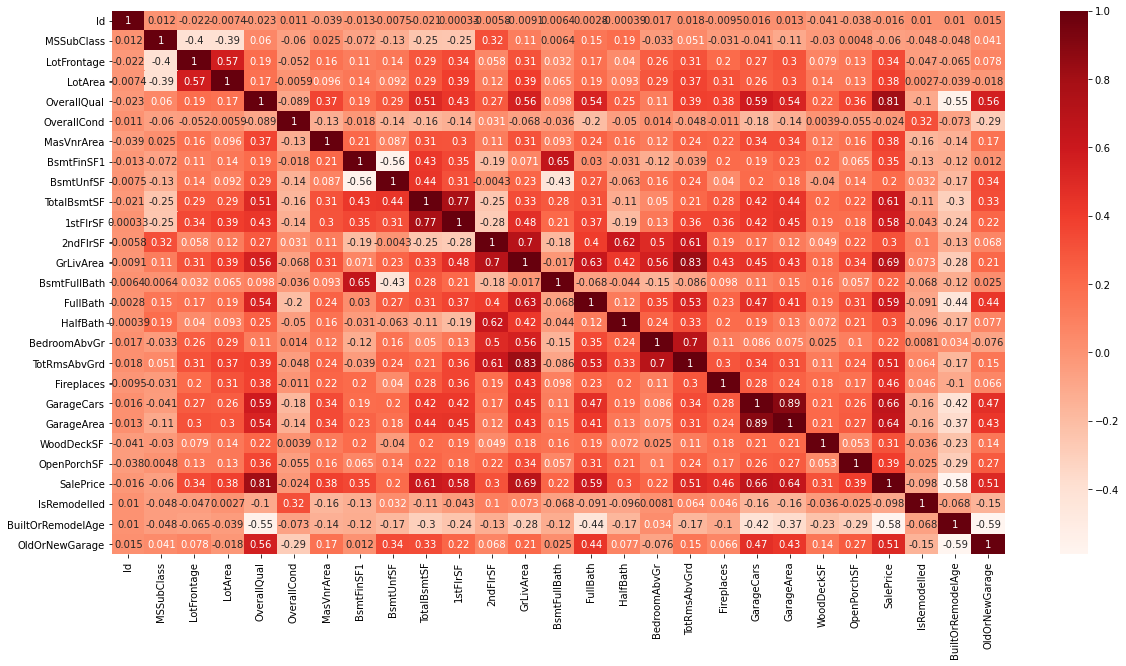

In [247]:
# Check the correlation of numerical columns

plt.figure(figsize = (20, 10))
sns.heatmap(housing_dtls.corr(), annot = True, cmap="Reds")
plt.show()

#### High correlation

We could observe few high correlation variables in the heat map. Highly correlated variables, will not add value to the model so 
we have to remove them carefully.

    - TotRmsAbvGrd and GrLivArea show 82%
    - Garage Area and Garage Cars show 88%

Hence dropping TotRmsAbvGrd and Garage Cars

In [248]:
# Removing the highly correlated variables and check the shape of the dataframe
housing_dtls.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)
housing_dtls.shape

(1358, 47)

## Step 4: Data Preparation

Its the time to prepare the data for our further analysis, let's view the various values present in each column.

In [249]:
print("LotShape->",housing_dtls.LotShape.unique())
print("ExterQual->", housing_dtls.ExterQual.unique())
print("BsmtQual->", housing_dtls.BsmtQual.unique())
print("BsmtExposure->",housing_dtls.BsmtExposure.unique())
print("BsmtFinType1->",housing_dtls.BsmtFinType1.unique())
print("HeatingQC->",housing_dtls.HeatingQC.unique())
print("KitchenQual->",housing_dtls.KitchenQual.unique())
print("FireplaceQu->",housing_dtls.FireplaceQu.unique())
print("GarageFinish->",housing_dtls.GarageFinish.unique())
print("BldgType->",housing_dtls.BldgType.unique())
print("HouseStyle->",housing_dtls.HouseStyle.unique())
print("Fence->",housing_dtls.Fence.unique())
print("LotConfig->",housing_dtls.LotConfig.unique())
print("MasVnrType->",housing_dtls.MasVnrType.unique())
print("SaleCondition->",housing_dtls.SaleCondition.unique())

LotShape-> ['Reg' 'IR1' 'IR2' 'IR3']
ExterQual-> ['Gd' 'TA' 'Ex' 'Fa']
BsmtQual-> ['Gd' 'TA' 'Ex' 'None' 'Fa']
BsmtExposure-> ['No' 'Gd' 'Mn' 'Av' 'None']
BsmtFinType1-> ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'None' 'LwQ']
HeatingQC-> ['Ex' 'Gd' 'TA' 'Fa' 'Po']
KitchenQual-> ['Gd' 'TA' 'Ex' 'Fa']
FireplaceQu-> ['None' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageFinish-> ['RFn' 'Unf' 'Fin' 'None']
BldgType-> ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle-> ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
Fence-> ['None' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
LotConfig-> ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
MasVnrType-> ['BrkFace' 'None' 'Stone' 'BrkCmn']
SaleCondition-> ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']


For the above categorical variables, we need to assign logical ordinal number. So, our next step is

  - Converting categorical data into numerical data.
  - Creating Dummy columns
  - After creating the dummy columns drop the original columns

- For values which can be ordered, we can give ordered sequence value
- For values which cannot be ordered, we have categorised them into 0 and 1

In [250]:
housing_dtls['d_LotShape'] = housing_dtls['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
housing_dtls['d_ExterQual'] = housing_dtls['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
housing_dtls['d_BsmtQual'] = housing_dtls['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_dtls['d_BsmtExposure'] = housing_dtls['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
housing_dtls['d_BsmtFinType1'] = housing_dtls['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
housing_dtls['d_HeatingQC'] = housing_dtls['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_dtls['d_KitchenQual'] = housing_dtls['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_dtls['d_FireplaceQu'] = housing_dtls['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_dtls['d_GarageFinish'] = housing_dtls['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
housing_dtls['d_BldgType'] = housing_dtls['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
housing_dtls['d_HouseStyle'] = housing_dtls['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
housing_dtls['d_Fence'] = housing_dtls['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
housing_dtls['d_LotConfig'] = housing_dtls['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
housing_dtls['d_MasVnrType'] = housing_dtls['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
housing_dtls['d_SaleCondition'] = housing_dtls['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
housing_dtls.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,5,4,0,2,1,4,0,5,1,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,5,3,3,2,1,1,0,2,0,1
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,5,4,3,2,1,4,0,5,1,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,4,4,4,1,1,4,0,4,0,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,5,4,3,2,1,4,0,2,1,1


In [251]:
# drop the old columns from which the new columns were derived
# We can also drop the id column as it will not be used any more

housing_dtls = housing_dtls.drop(['Id', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

housing_dtls.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,2,1,1


There are still few columns we yet to understand and prepare the data. Let's visualize the following columns

- MSZoning
- Neighborhood
- RoofStyle
- Exterior1st
- Exterior2nd
- Foundation
- GarageType

In [252]:
# View unique column values of the above columns.

print("MSZoning->",housing_dtls.MSZoning.unique())
print("ExterQual->", housing_dtls.Neighborhood.unique())
print("RoofStyle->", housing_dtls.RoofStyle.unique())
print("Exterior1st->",housing_dtls.Exterior1st.unique())
print("Exterior2nd->",housing_dtls.Exterior2nd.unique())
print("Foundation->",housing_dtls.Foundation.unique())
print("GarageType->",housing_dtls.GarageType.unique())

MSZoning-> ['RL' 'RM' 'C (all)' 'FV' 'RH']
ExterQual-> ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'ClearCr' 'NPkVill' 'StoneBr'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
RoofStyle-> ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
Exterior1st-> ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
Exterior2nd-> ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Other'
 'Stone' 'CBlock']
Foundation-> ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']
GarageType-> ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'None' 'Basment' '2Types']


In [253]:
# For the following columns create dummies

# Creating dummies for MSZoning

d_MSZoning = pd.get_dummies(housing_dtls['MSZoning'], prefix='MSZoning', drop_first = True)
housing_dtls = pd.concat([housing_dtls, d_MSZoning], axis = 1)

# Creating dummies for Neighborhood

d_Neighborhood = pd.get_dummies(housing_dtls['Neighborhood'], prefix='Neighborhood', drop_first = True)
housing_dtls = pd.concat([housing_dtls, d_Neighborhood], axis = 1)

# Creating dummies for RoofStyle

d_RoofStyle = pd.get_dummies(housing_dtls['RoofStyle'], prefix='RoofStyle', drop_first = True)
housing_dtls = pd.concat([housing_dtls, d_RoofStyle], axis = 1)

# Creating dummies for Exterior1st

d_Exterior1st = pd.get_dummies(housing_dtls['Exterior1st'], prefix='Exterior1st', drop_first = True)
housing_dtls = pd.concat([housing_dtls, d_Exterior1st], axis = 1)

# Creating dummies for Exterior2nd

d_Exterior2nd = pd.get_dummies(housing_dtls['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
housing_dtls = pd.concat([housing_dtls, d_Exterior2nd], axis = 1)

# Creating dummies for Foundation

d_Foundation = pd.get_dummies(housing_dtls['Foundation'], prefix='Foundation', drop_first = True)
housing_dtls = pd.concat([housing_dtls, d_Foundation], axis = 1)

# Creating dummies for GarageType

d_GarageType = pd.get_dummies(housing_dtls['GarageType'], prefix='GarageType', drop_first = True)
housing_dtls = pd.concat([housing_dtls, d_GarageType], axis = 1)

housing_dtls.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0


In [254]:
# drop the below columns as we now have new columns derived from these columns

housing_dtls = housing_dtls.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

housing_dtls.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [255]:
housing_dtls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Columns: 112 entries, MSSubClass to GarageType_None
dtypes: float64(3), int64(36), uint8(73)
memory usage: 521.2 KB


All columns in the data set are now numeric !!!

## Step 5: Train Test Split

In [256]:
# Takeout the target variable X and putting all feature variable to X

X = housing_dtls.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [257]:
# Putting response variable to y

y = housing_dtls['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

#### Scaling the features

In [258]:
# scaling the features

from sklearn.preprocessing import scale

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=111)

In [259]:
# split into train and test

from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

## Step 6: Feature elimination (RFE)

    As there are around 111 features available, we need to get the best features for our further analysis, for this we will use RFE to get the best 50 features out of the 111 features.

In [260]:
# Running RFE with the output number of the variable equal to 50

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

In [261]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,LotArea,True,1
1,OverallQual,True,1
2,OverallCond,True,1
3,BsmtFinSF1,True,1
4,TotalBsmtSF,True,1
5,1stFlrSF,True,1
6,2ndFlrSF,True,1
7,GrLivArea,True,1
8,BsmtFullBath,True,1
9,FullBath,True,1


In [262]:
# Assign the 50 columns to X_train_rfe

X_train_rfe = X_train[col]

In [263]:
# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

## Step 6: Model Building and Evaluation

### Lasso Regression

In [291]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (950, 50)
y_train (950,)


In [292]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

The above graph displays the top 10 variables based on the Lasso Regression model that are significant in predicting the price 
of a house.  

In [293]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011356,0.005932,0.001600,0.003200,0.0001,{'alpha': 0.0001},-0.096434,-0.083741,-0.073980,-0.085609,...,-0.084488,0.007186,1,-0.074698,-0.078037,-0.079679,-0.078030,-0.078099,-0.077709,0.001632
1,0.000000,0.000000,0.004836,0.003948,0.001,{'alpha': 0.001},-0.097126,-0.083929,-0.073268,-0.086043,...,-0.084782,0.007600,2,-0.075985,-0.078817,-0.080763,-0.079086,-0.078934,-0.078717,0.001539
2,0.003237,0.003964,0.000000,0.000000,0.01,{'alpha': 0.01},-0.098184,-0.088888,-0.081032,-0.086465,...,-0.089263,0.005683,3,-0.083198,-0.085188,-0.086714,-0.085555,-0.084917,-0.085115,0.001137
3,0.003231,0.003957,0.000000,0.000000,0.05,{'alpha': 0.05},-0.118940,-0.118890,-0.108940,-0.106512,...,-0.114628,0.005698,4,-0.112712,-0.114292,-0.112598,-0.116473,-0.110896,-0.113394,0.001878
4,0.003237,0.003965,0.001611,0.003222,0.1,{'alpha': 0.1},-0.163068,-0.158427,-0.149133,-0.148553,...,-0.155521,0.005713,5,-0.154526,-0.153320,-0.155062,-0.159040,-0.151359,-0.154662,0.002532


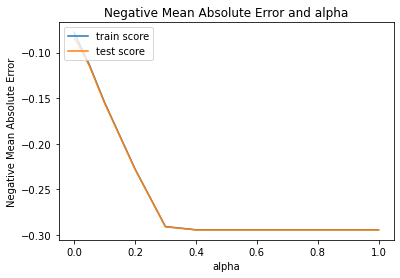

In [294]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Observation:
                 The above graph we can observe that the Negative Mean Absolute Error is low at alpha = 0.4 and stabilizes thereafter, but we will choose a low value of alpha to balance the trade-off between Bias-Variance and to get the coefficients of smallest of features.

In [295]:
# At alpha = 0.01, even the smallest of negative coefficients that have some predictive power towards 
# 'SalePrice' have been generated

alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([ 0.02129909,  0.0963613 ,  0.02790017,  0.04023921,  0.04716444,
        0.00067988,  0.        ,  0.09574096,  0.        ,  0.        ,
        0.00896815,  0.01913907,  0.03912113,  0.00624345, -0.00252294,
       -0.02815513,  0.00206871,  0.00122272,  0.00852813,  0.01495518,
        0.02076791,  0.01785077, -0.0014203 ,  0.01337111,  0.00679992,
       -0.        ,  0.01097413, -0.01388108,  0.01456859, -0.00311936,
       -0.        ,  0.00696529, -0.01014073, -0.        ,  0.00116398,
       -0.00327274,  0.        , -0.        , -0.        ,  0.        ,
       -0.00886261,  0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.01911046,  0.        ,  0.        , -0.00198246])

###### The advantage of Lasso Regression techinuqe is clearly visible here, as Lasso brings the coefficients of insignificant features to zero.

In [296]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.995),
 ('MSSubClass', 0.021),
 ('LotFrontage', 0.096),
 ('LotArea', 0.028),
 ('OverallQual', 0.04),
 ('OverallCond', 0.047),
 ('MasVnrArea', 0.001),
 ('BsmtFinSF1', 0.0),
 ('BsmtUnfSF', 0.096),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.009),
 ('GrLivArea', 0.019),
 ('BsmtFullBath', 0.039),
 ('FullBath', 0.006),
 ('HalfBath', -0.003),
 ('BedroomAbvGr', -0.028),
 ('Fireplaces', 0.002),
 ('GarageCars', 0.001),
 ('WoodDeckSF', 0.009),
 ('OpenPorchSF', 0.015),
 ('IsRemodelled', 0.021),
 ('BuiltOrRemodelAge', 0.018),
 ('OldOrNewGarage', -0.001),
 ('d_LotShape', 0.013),
 ('d_ExterQual', 0.007),
 ('d_BsmtQual', -0.0),
 ('d_BsmtExposure', 0.011),
 ('d_BsmtFinType1', -0.014),
 ('d_HeatingQC', 0.015),
 ('d_KitchenQual', -0.003),
 ('d_FireplaceQu', -0.0),
 ('d_GarageFinish', 0.007),
 ('d_BldgType', -0.01),
 ('d_HouseStyle', -0.0),
 ('d_Fence', 0.001),
 ('d_LotConfig', -0.003),
 ('d_MasVnrType', 0.0),
 ('d_SaleCondition', -0.0),
 ('MSZoning_FV', -0.0),
 ('MSZoning_

In [299]:
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8984615445358305
0.8980432629064229


In [300]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.11909875785548286


* The R2 values for Train and Test matches well, this indicates optimum model.

###### Creating a dataframe for the coefficients obtained from Lasso

In [301]:

mod = list(zip(cols, model_parameters))
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

,Variable,Coeff
0,constant,11.995
1,MSSubClass,0.021
2,LotFrontage,0.096
3,LotArea,0.028
4,OverallQual,0.040


In [302]:
# Select only the non zero coefficients and sort them in ascending order.
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

,Variable,Coeff
0,constant,11.995
2,LotFrontage,0.096
8,BsmtUnfSF,0.096
5,OverallCond,0.047
4,OverallQual,0.040
13,BsmtFullBath,0.039
3,LotArea,0.028
21,IsRemodelled,0.021
1,MSSubClass,0.021
12,GrLivArea,0.019


In [303]:
pred.shape

(34, 2)

In [304]:
Lassso_var = list(pred['Variable'])
print(Lassso_var)

['constant', 'LotFrontage', 'BsmtUnfSF', 'OverallCond', 'OverallQual', 'BsmtFullBath', 'LotArea', 'IsRemodelled', 'MSSubClass', 'GrLivArea', 'Neighborhood_CollgCr', 'BuiltOrRemodelAge', 'd_HeatingQC', 'OpenPorchSF', 'd_LotShape', 'd_BsmtExposure', '2ndFlrSF', 'WoodDeckSF', 'd_GarageFinish', 'd_ExterQual', 'FullBath', 'Fireplaces', 'GarageCars', 'MasVnrArea', 'd_Fence', 'OldOrNewGarage', 'Neighborhood_Gilbert', 'd_LotConfig', 'd_KitchenQual', 'HalfBath', 'MSZoning_RL', 'd_BldgType', 'd_BsmtFinType1', 'BedroomAbvGr']


###### These 34 variables obtained from Lasso Regression can be concluded to have the strong effect on the SalePrice

### Ridge Regression

In [309]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [310]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002830,0.003552,0.000090,0.000180,0.0001,{'alpha': 0.0001},-0.096379,-0.083707,-0.074586,-0.086123,...,-0.084663,0.007021,25,-0.074563,-0.078115,-0.079704,-0.077984,-0.078144,-0.077702,0.001692
1,0.003334,0.003884,0.000968,0.001698,0.001,{'alpha': 0.001},-0.096379,-0.083707,-0.074585,-0.086122,...,-0.084663,0.007021,24,-0.074563,-0.078115,-0.079704,-0.077984,-0.078144,-0.077702,0.001692
2,0.001612,0.003224,0.003203,0.003923,0.01,{'alpha': 0.01},-0.096380,-0.083707,-0.074578,-0.086116,...,-0.084660,0.007023,23,-0.074564,-0.078114,-0.079704,-0.077984,-0.078144,-0.077702,0.001691
3,0.001607,0.003196,0.003268,0.004003,0.05,{'alpha': 0.05},-0.096381,-0.083709,-0.074544,-0.086090,...,-0.084649,0.007032,22,-0.074568,-0.078107,-0.079700,-0.077981,-0.078142,-0.077700,0.001688
4,0.001621,0.003242,0.000000,0.000000,0.1,{'alpha': 0.1},-0.096383,-0.083712,-0.074504,-0.086059,...,-0.084635,0.007043,21,-0.074574,-0.078098,-0.079697,-0.077977,-0.078140,-0.077697,0.001684


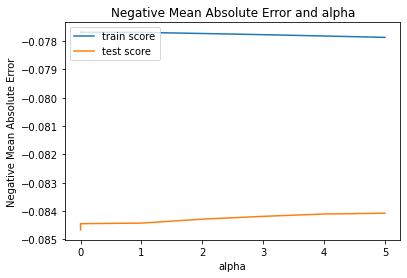

In [311]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

###### If you look at the above chart the Negative Mean Absolute Error stabilises at alpha = 2, therefore we will choose this for our further analysis

In [312]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.02232705,  0.06731574,  0.04539785,  0.0325329 ,  0.04512812,
        0.00176223, -0.00564426,  0.10549437,  0.01165007,  0.01073759,
        0.01960009,  0.02098783,  0.03686075,  0.01015803, -0.01209299,
       -0.01772191,  0.01394735,  0.01470811,  0.01680482,  0.01840485,
        0.01606596,  0.01484373, -0.01881169,  0.01419395,  0.07658665,
        0.0317384 ,  0.12202048,  0.09066618,  0.02616449, -0.01157843,
       -0.00852448,  0.0231339 , -0.01567414, -0.01054137,  0.01740846,
       -0.00963863, -0.01622367, -0.00513198,  0.01224459, -0.04745889,
       -0.03347505,  0.01465732, -0.01683715,  0.04138984,  0.02187085,
        0.02251997,  0.04411374,  0.01788596,  0.00764674, -0.00911352])

In [313]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.996),
 ('MSSubClass', 0.022),
 ('LotFrontage', 0.067),
 ('LotArea', 0.045),
 ('OverallQual', 0.033),
 ('OverallCond', 0.045),
 ('MasVnrArea', 0.002),
 ('BsmtFinSF1', -0.006),
 ('BsmtUnfSF', 0.105),
 ('TotalBsmtSF', 0.012),
 ('1stFlrSF', 0.011),
 ('2ndFlrSF', 0.02),
 ('GrLivArea', 0.021),
 ('BsmtFullBath', 0.037),
 ('FullBath', 0.01),
 ('HalfBath', -0.012),
 ('BedroomAbvGr', -0.018),
 ('Fireplaces', 0.014),
 ('GarageCars', 0.015),
 ('WoodDeckSF', 0.017),
 ('OpenPorchSF', 0.018),
 ('IsRemodelled', 0.016),
 ('BuiltOrRemodelAge', 0.015),
 ('OldOrNewGarage', -0.019),
 ('d_LotShape', 0.014),
 ('d_ExterQual', 0.077),
 ('d_BsmtQual', 0.032),
 ('d_BsmtExposure', 0.122),
 ('d_BsmtFinType1', 0.091),
 ('d_HeatingQC', 0.026),
 ('d_KitchenQual', -0.012),
 ('d_FireplaceQu', -0.009),
 ('d_GarageFinish', 0.023),
 ('d_BldgType', -0.016),
 ('d_HouseStyle', -0.011),
 ('d_Fence', 0.017),
 ('d_LotConfig', -0.01),
 ('d_MasVnrType', -0.016),
 ('d_SaleCondition', -0.005),
 ('MSZoning_FV', 0.01

In [314]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9193052967610829
0.9009602238197991


In [315]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.11738269949969836


It is clearly visible that the model performance of Ridge is better than Lasso. The train and the test scores are matching well

In [316]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

In [317]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

,Variable,Coeff
0,constant,11.996
27,d_BsmtExposure,0.122
8,BsmtUnfSF,0.105
28,d_BsmtFinType1,0.091
25,d_ExterQual,0.077
2,LotFrontage,0.067
3,LotArea,0.045
5,OverallCond,0.045
47,Neighborhood_CollgCr,0.044
44,Neighborhood_BrDale,0.041


In [318]:
# Sorting the coefficients in ascending order and removed the features of which the coefficient is equal to 0.
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])

,Variable,Coeff
0,constant,11.996
27,d_BsmtExposure,0.122
8,BsmtUnfSF,0.105
28,d_BsmtFinType1,0.091
25,d_ExterQual,0.077
2,LotFrontage,0.067
3,LotArea,0.045
5,OverallCond,0.045
47,Neighborhood_CollgCr,0.044
44,Neighborhood_BrDale,0.041


In [320]:
print(predRFE['Variable'])

0                 constant
27          d_BsmtExposure
8                BsmtUnfSF
28          d_BsmtFinType1
25             d_ExterQual
2              LotFrontage
3                  LotArea
5              OverallCond
47    Neighborhood_CollgCr
44     Neighborhood_BrDale
13            BsmtFullBath
4              OverallQual
26              d_BsmtQual
29             d_HeatingQC
32          d_GarageFinish
46    Neighborhood_ClearCr
1               MSSubClass
45    Neighborhood_BrkSide
12               GrLivArea
11                2ndFlrSF
48    Neighborhood_Crawfor
20             OpenPorchSF
19              WoodDeckSF
35                 d_Fence
21            IsRemodelled
18              GarageCars
22       BuiltOrRemodelAge
42             MSZoning_RM
17              Fireplaces
24              d_LotShape
39             MSZoning_FV
9              TotalBsmtSF
10                1stFlrSF
14                FullBath
49    Neighborhood_Edwards
6               MasVnrArea
38         d_SaleCondition
7

In [322]:
### Assign the Features as x1, x2..... to identify top important predictor variables

pred.set_index(pd.Index(['C','x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16','x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33']), inplace = True) 
pred

,Variable,Coeff
C,constant,11.995
x1,LotFrontage,0.096
x2,BsmtUnfSF,0.096
x3,OverallCond,0.047
x4,OverallQual,0.040
x5,BsmtFullBath,0.039
x6,LotArea,0.028
x7,IsRemodelled,0.021
x8,MSSubClass,0.021
x9,GrLivArea,0.019


## Conclusion :

- The optimal lambda value in case of Ridge and Lasso is as below:
    - Ridge - 10
    - Lasso - 0.4
    
- The Mean Squared error in case of Ridge and Lasso are:
    - Ridge - 0.117382
    - Lasso - 0.119098

- Also, since Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso has a 
  better edge over Ridge.
  
- Hence based on Lasso, the factors that generally affect the price are Lasso Important predictor variables are listed below:
'LotFrontage', 'BsmtUnfSF', 'OverallCond', 'OverallQual', 'BsmtFullBath', 'LotArea' 
    
Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the 
price of a house.